<a href="https://colab.research.google.com/github/Apoorvdhavalikar27/Deep_Learning/blob/main/Implementation_Of_CNN_On_mini-image_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

In [ ]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

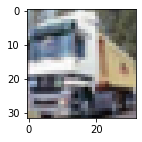

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

y_test and y_train are 2d arrays, we convert it into 1d array by reshaping

In [ ]:
y_test = y_test.reshape(-1)
y_test[:5]

y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def showimage(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


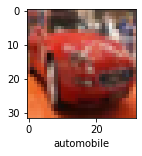

In [ ]:
showimage(X_train,y_train,5)

In [ ]:
X_test = X_test/255
X_train = X_train/255

In [ ]:
ANN = keras.Sequential([
           keras.layers.Flatten(input_shape = (32,32,3)),
           keras.layers.Dense(3000,activation='relu'),
           keras.layers.Dense(1000,activation='relu'),
           keras.layers.Dense(10,activation='sigmoid')             
])

ANN.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
ANN.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8954 - accuracy: 0.3252
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6710 - accuracy: 0.4005
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5915 - accuracy: 0.4305
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5385 - accuracy: 0.4502
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4965 - accuracy: 0.4642
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4713 - accuracy: 0.4729
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4464 - accuracy: 0.4806
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4249 - accuracy: 0.4897
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4014 - accuracy: 0.4989
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.376

In [ ]:
ANN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4702 - accuracy: 0.4808


[1.4702118635177612, 0.48080000281333923]

In [ ]:
y_p = ANN.predict(X_test)
y_p[:5]

array([[8.1612557e-02, 1.3993306e-01, 3.2020235e-01, 6.3256657e-01,
        4.1799042e-01, 5.1146561e-01, 4.1372728e-01, 6.7344956e-02,
        3.0130929e-01, 5.5644590e-02],
       [8.3015126e-01, 9.8160768e-01, 2.6907790e-01, 2.0365212e-04,
        5.3908098e-03, 7.0060320e-05, 2.0119724e-04, 7.3088231e-03,
        9.9547994e-01, 9.7524911e-01],
       [8.7303472e-01, 9.5407009e-01, 2.3674504e-01, 2.7119875e-02,
        2.9894650e-02, 1.9993862e-02, 1.9117240e-03, 8.0443718e-02,
        9.8183030e-01, 8.6287129e-01],
       [7.8982091e-01, 5.1852846e-01, 5.5152452e-01, 1.3941000e-01,
        4.7483361e-01, 1.0373168e-01, 6.4577743e-02, 1.7031619e-01,
        9.0172571e-01, 3.3872750e-01],
       [3.0161705e-02, 1.7208551e-03, 5.9180176e-01, 5.0344098e-01,
        9.6064681e-01, 6.6132450e-01, 9.2179912e-01, 8.3432473e-02,
        3.2386035e-02, 2.4931820e-03]], dtype=float32)

In [ ]:
np.argmax([10,15,3,50])
# Element at index 3 is maximum

3

In [ ]:
ann_predicted = []
for i in range(len(y_p)):
  ann_predicted.append(np.argmax(y_p[i]))

ann_predicted[:5]

[3, 8, 8, 8, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
truth = y_test

In [ ]:
print(classification_report(truth,ann_predicted))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50      1000
           1       0.60      0.58      0.59      1000
           2       0.39      0.24      0.29      1000
           3       0.35      0.29      0.32      1000
           4       0.43      0.45      0.44      1000
           5       0.39      0.34      0.36      1000
           6       0.49      0.61      0.54      1000
           7       0.56      0.55      0.55      1000
           8       0.52      0.72      0.60      1000
           9       0.53      0.52      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.47      0.48      0.47     10000
weighted avg       0.47      0.48      0.47     10000



Now let's design CNN

In [ ]:
CNN = keras.Sequential([
                        # CNN
           keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',input_shape = (32,32,3)),
           keras.layers.MaxPooling2D((2,2)),
           keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
           keras.layers.MaxPooling2D((2,2)),

                       # dense 
           keras.layers.Flatten(),
           keras.layers.Dense(1000,activation='relu'),
           keras.layers.Dense(10,activation='softmax')             
])
CNN.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
CNN.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 3ms/step - loss: 1.3263 - accuracy: 0.5260
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9435 - accuracy: 0.6711
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7390 - accuracy: 0.7410
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.8024
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3912 - accuracy: 0.8652
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2438 - accuracy: 0.9157
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1466 - accuracy: 0.9511
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1079 - accuracy: 0.9637
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0902 - accuracy: 0.9688
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.082

In [ ]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6321 - accuracy: 0.7121


[1.6321361064910889, 0.7121000289916992]

Using CNN accuracy is clearly increased but testing accuracy is less than training accuracy

In [ ]:
predict = CNN.predict(X_test)
predict[:2]

array([[5.4584753e-08, 4.2019808e-11, 2.3407008e-05, 9.9997473e-01,
        2.0362451e-10, 1.9180395e-06, 1.7325489e-09, 3.8691114e-15,
        5.3250394e-11, 1.4271243e-14],
       [2.7313099e-06, 5.2229082e-03, 9.5274063e-14, 2.5151308e-17,
        7.2374340e-17, 9.1653577e-17, 6.0024532e-15, 1.8482018e-14,
        9.9476916e-01, 5.2446417e-06]], dtype=float32)

In [ ]:
cnn_predicted = []
for i in range(len(predict)):
  cnn_predicted.append(np.argmax(predict[i]))

In [ ]:
cnn_predicted[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
print(classification_report(y_test,cnn_predicted))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1000
           1       0.86      0.78      0.82      1000
           2       0.66      0.60      0.63      1000
           3       0.52      0.55      0.54      1000
           4       0.66      0.64      0.65      1000
           5       0.59      0.59      0.59      1000
           6       0.77      0.79      0.78      1000
           7       0.72      0.80      0.76      1000
           8       0.83      0.82      0.83      1000
           9       0.77      0.79      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



So F1-score of each class is incresed after use of CNN